In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../..'))
from dataset import ZtfDataSet,DataSet
import pandas as pd
import utils
import numpy as np
from matplotlib import pyplot as plt
import torch
%load_ext autoreload
np.random.seed(2) 
torch.manual_seed(2)

In [3]:
%autoreload

## Peek at Light Curve Characteristics

In [10]:
seed=2
folder = '../../datasets/ZTF_g'
min_length=25
sep=','
start_col=1
keep_missing=False
np.random.seed(seed=seed) 
torch.manual_seed(seed=seed)
if folder.lower().find('ztf') > 0: lcs = ZtfDataSet(folder)
else: lcs = DataSet(folder)
lcs.files_to_df()
lcs.read(sep=sep)
lcs.prune(min_length=min_length, start_col=start_col, keep_missing=keep_missing)
lcs.set_mean_mag()
lcs.set_sigma_xs()
lcs.set_med_cadence()

found 3408 for band='g'


Text(0.5, 0, '$log_{10} \\, b$')

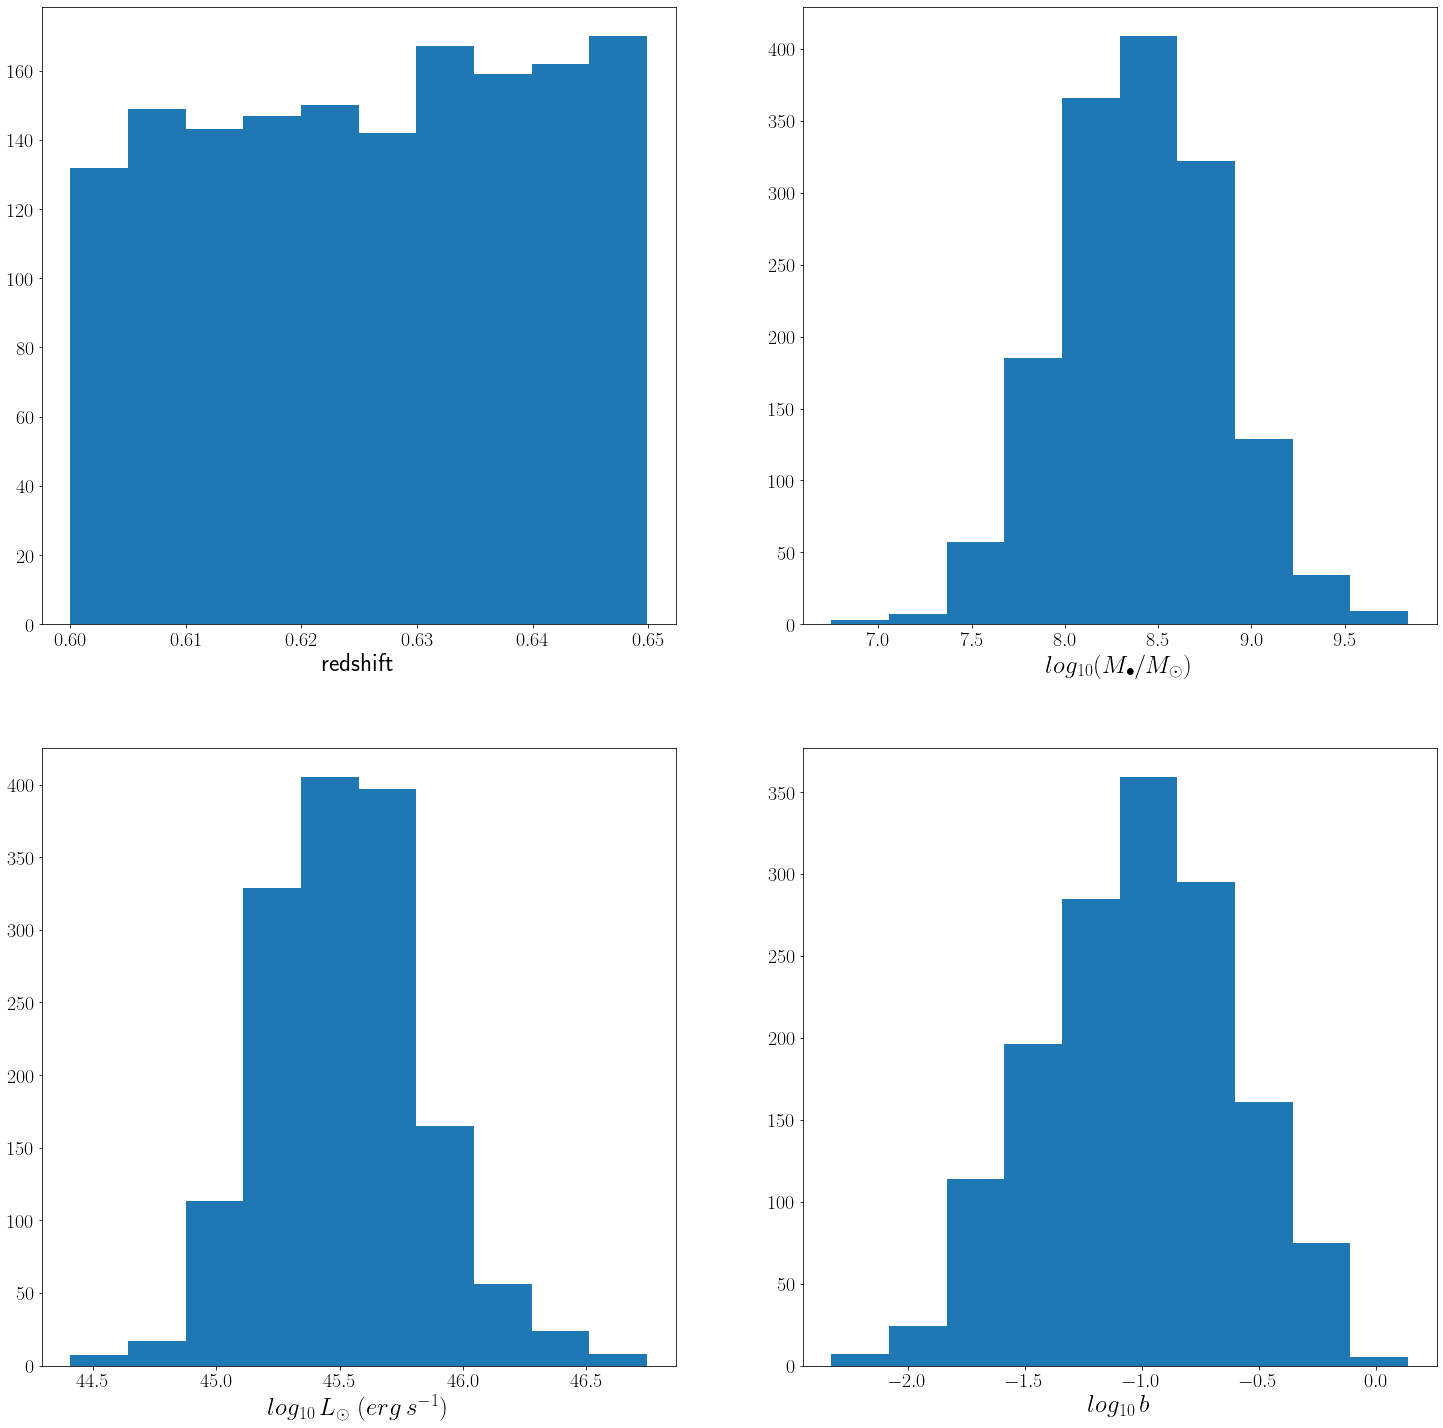

In [283]:
## associate phyiscal parameters from sample catalog with valid objs from dataset
sample_df = pd.read_csv('../../datasets/catalogs/sample_cat')
sample_df = sample_df.set_index('SDSS')

locs = list(set(sample_df.index.values).intersection(set(lcs.valid_files_df.index.values)))
z = sample_df.loc[locs]['z'].values
log_mbh = sample_df.loc[locs]['logMBH'].values
log_lbol = sample_df.loc[locs]['logLbol'].values
log_redd = sample_df.loc[locs]['LogREdd'].values


plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
fig, ax = plt.subplots(2,2, figsize=(25,25))
fs = 25

rm_objs = pd.read_csv('../../datasets/catalogs/rm_sample').loc[:,'z'].values
#zs = np.concatenate((rm_objs,z))
#bins = np.arange(np.max(zs), step=0.05)
ax[0][0].hist(z)
ax[0][0].set_xlabel(r'redshift', fontsize=fs)

ax[0][1].hist(log_mbh)
ax[0][1].set_xlabel(r'$log_{10}(M_{\bullet} / M_{\odot})$', fontsize=fs)

ax[1][0].hist(log_lbol)
ax[1][0].set_xlabel(r'$log_{10} \, L_{\odot} \ (erg\, s^{-1})$',fontsize=fs)

ax[1][1].hist(log_redd)
ax[1][1].set_xlabel(r'$log_{10} \, b$',fontsize=fs)

# plt.savefig('../img/phys_params_dist')

In [334]:
scores = np.array([-0.43525026, -0.42798292, -0.44076264, -0.43263434, -0.4366748 ,
       -0.44493489, -0.44422934, -0.42856037, -0.43005191, -0.42900136,
       -0.43549507, -0.42743847, -0.450861  , -0.43046445, -0.4268653 ,
       -0.43467687, -0.43163644, -0.44297876, -0.46321562, -0.44646781,
       -0.4505622 , -0.43653941, -0.43957161, -0.45167289, -0.46004182,
       -0.43255701, -0.44593518, -0.43067993, -0.43519828, -0.44843933,
       -0.43873537, -0.43528164, -0.44010198, -0.44244944, -0.43076539,
       -0.43866611, -0.44681576, -0.4248508 , -0.44421714, -0.44109161,
       -0.43487736, -0.44158733, -0.44827464, -0.44139205, -0.43267947,
       -0.44788878, -0.43702405, -0.44293463, -0.44488241, -0.43988313,
       -0.43829019, -0.43647223, -0.43519447, -0.43985082, -0.44299505,
       -0.44101037, -0.43796007, -0.44216864, -0.43665251, -0.44145251,
       -0.44052971, -0.43241218, -0.42120565, -0.43764686, -0.43134741,
       -0.43032147, -0.45224008, -0.44019663, -0.4382878 , -0.43731335,
       -0.43272527, -0.43993787, -0.43494233, -0.44349599, -0.45361453,
       -0.44379472, -0.42862921, -0.46895718, -0.43669048, -0.43741681,
       -0.44334605, -0.44075318, -0.43421082, -0.44785237, -0.42950427,
       -0.44100754, -0.4313923 , -0.44900518, -0.42964736, -0.44523265,
       -0.43765719, -0.43124127, -0.44393186, -0.43607388, -0.43659001,
       -0.43134111, -0.43200688, -0.43925911, -0.43570108, -0.45255713,
       -0.44819494, -0.43318319, -0.44467052, -0.43886613, -0.4402925 ,
       -0.42733602, -0.45269279, -0.42661045, -0.44656646, -0.43036774,
       -0.44645437, -0.43949835, -0.43744984, -0.43517476, -0.44393376,
       -0.4461947 , -0.42980268, -0.43965665, -0.43605866, -0.43194036,
       -0.43195018, -0.44622561, -0.42598097, -0.44170759, -0.43861277,
       -0.44604411, -0.43650709, -0.4323221 , -0.43484657, -0.43874154,
       -0.43231489, -0.44170996, -0.45228308, -0.44071617, -0.44427467,
       -0.46819086, -0.43422007, -0.43989742, -0.44231216, -0.43332139,
       -0.45619051, -0.42285836, -0.43754193, -0.43760842, -0.42648286,
       -0.43780654, -0.43409768, -0.43781123, -0.4326225 , -0.43978488,
       -0.45272572, -0.43112664, -0.4350858 , -0.44790936, -0.43433325,
       -0.44861635, -0.43507529, -0.43463827, -0.42890836, -0.43153462,
       -0.44070931, -0.43562417, -0.4405724 , -0.44802641, -0.43680079,
       -0.4393508 , -0.44217006, -0.43818578, -0.42963961, -0.43205456,
       -0.43345419, -0.44028421, -0.4330415 , -0.43779887, -0.435584  ,
       -0.42351366, -0.44148561, -0.44150724, -0.42494735, -0.44816712,
       -0.43403197, -0.43775181, -0.43598583, -0.43779513, -0.43392138,
       -0.44268581, -0.42643708, -0.43262239, -0.45353432, -0.42484758,
       -0.43609517, -0.44141027, -0.44196624, -0.42139402, -0.43590979,
       -0.43811665, -0.43342346, -0.4310192 , -0.44270078, -0.4412639 ,
       -0.45036088, -0.43615374, -0.44108805, -0.43143895, -0.43497408,
       -0.43459979, -0.43709766, -0.44262139, -0.4408733 , -0.44689282,
       -0.43931349, -0.43481692, -0.43446828, -0.44625017, -0.44597133,
       -0.43741728, -0.44784244, -0.45116096, -0.44475696, -0.44003948,
       -0.45284324, -0.44211105, -0.43606463, -0.45180395, -0.44506119,
       -0.43423534, -0.4592645 , -0.43548407, -0.43029564, -0.43339967,
       -0.44984368, -0.42556124, -0.45043757, -0.44784884, -0.43479438,
       -0.45511051, -0.42437357, -0.43061511, -0.43221155, -0.42601305,
       -0.4440388 , -0.4382384 , -0.44279359, -0.43328348, -0.45202777,
       -0.4317137 , -0.45465486, -0.43738349, -0.43155181, -0.43796713,
       -0.43956662, -0.44697599, -0.42918988, -0.43500907, -0.44256797,
       -0.43004739, -0.44036337, -0.43741674, -0.4319102 , -0.43716674,
       -0.45804657, -0.43087347, -0.4267718 , -0.44092602, -0.43238174,
       -0.42456392, -0.45048632, -0.44163925, -0.43372046, -0.44511426,
       -0.43166434, -0.43575864, -0.44590658, -0.43825493, -0.43405315,
       -0.44134614, -0.42358721, -0.43398277, -0.43481975, -0.45931441,
       -0.43611709, -0.44200122, -0.43047573, -0.42604701, -0.43360567,
       -0.43241057, -0.44543613, -0.43329366, -0.43165642, -0.4247061 ,
       -0.42732204, -0.44809143, -0.43157568, -0.46655857, -0.43183263,
       -0.42958474, -0.44036427, -0.43743828, -0.44237644, -0.44193168,
       -0.43914879, -0.4365484 , -0.43001965, -0.43963515, -0.44586563,
       -0.42741479, -0.42945826, -0.43912231, -0.44217485, -0.46220586,
       -0.4328938 , -0.44481295, -0.42501644, -0.43284016, -0.42911597,
       -0.43542514, -0.42937   , -0.43062926, -0.43254193, -0.44920184,
       -0.41924233, -0.43418721, -0.42721726, -0.43817047, -0.43324044,
       -0.43355711, -0.43094858, -0.4478015 , -0.44227186, -0.43681134,
       -0.4429418 , -0.44695228, -0.44980749, -0.43284419, -0.4207357 ,
       -0.43678652, -0.42871668, -0.43288594, -0.43549253, -0.4306637 ,
       -0.43799957, -0.44238255, -0.44149379, -0.43968405, -0.4366226 ,
       -0.43693973, -0.43619174, -0.43239416, -0.43292655, -0.44798702,
       -0.4274569 , -0.45446428, -0.44048066, -0.45372124, -0.43508325,
       -0.44185652, -0.44366783, -0.43682109, -0.4431974 , -0.43632273,
       -0.45134194, -0.42878717, -0.43978667, -0.43494269, -0.44609246,
       -0.4296066 , -0.42869963, -0.43429894, -0.43099721, -0.44689231,
       -0.43942198, -0.44611828, -0.43591423, -0.42789035, -0.44238835,
       -0.42912925, -0.4419092 , -0.43246014, -0.42706875, -0.44288127,
       -0.44381441, -0.44153295, -0.44126493, -0.43099223, -0.4843061 ,
       -0.44122245, -0.42943779, -0.4211263 , -0.44913844, -0.45144229,
       -0.43539315, -0.42340496, -0.44963411, -0.44681254, -0.44556811,
       -0.46499338, -0.44870056, -0.44678921, -0.44517994, -0.44540955,
       -0.43793024, -0.43976376, -0.43995871, -0.43043214, -0.43482622,
       -0.4350802 , -0.42520481, -0.46060693, -0.42380221, -0.42389243,
       -0.43918814, -0.4718819 , -0.43370245, -0.43481655, -0.44056236,
       -0.47412419, -0.43305324, -0.43938297, -0.43257685, -0.43648665,
       -0.43699591, -0.42904656, -0.43143832, -0.42482943, -0.43817337,
       -0.43428259, -0.44481541, -0.44707384, -0.43452463, -0.43160179,
       -0.43336456, -0.44550253, -0.46122893, -0.45215627, -0.44135948,
       -0.43556895, -0.44068349, -0.4380759 , -0.47977284, -0.42897681,
       -0.4387453 , -0.45198186, -0.44539133, -0.4353698 , -0.43160289,
       -0.44338341, -0.42798925, -0.44678319, -0.45154616, -0.44036578,
       -0.43729195, -0.42293314, -0.41731576, -0.44149586, -0.42564057,
       -0.4188739 , -0.42735144, -0.44073654, -0.47413713, -0.43708618,
       -0.45128582, -0.44247617, -0.43959668, -0.43506968, -0.44543887,
       -0.43097429, -0.43123241, -0.45716391, -0.44064997, -0.46574474,
       -0.44055255, -0.43121744, -0.42917716, -0.43897403, -0.45955816,
       -0.43499872, -0.43779933, -0.43961806, -0.43629403, -0.44151382,
       -0.4315394 , -0.43767104, -0.42287447, -0.43832256, -0.42864166,
       -0.44416169, -0.44321743, -0.4277892 , -0.43976977, -0.43314215,
       -0.44322706, -0.43044571, -0.44329113, -0.43029562, -0.42628916,
       -0.4288252 , -0.42870331, -0.43992971, -0.44218915, -0.44448847,
       -0.44399177, -0.44285881, -0.44636852, -0.45214156, -0.44692385,
       -0.43670158, -0.4351871 , -0.42982878, -0.43400488, -0.44695964,
       -0.4328375 , -0.44418048, -0.43291198, -0.44617982, -0.42524462,
       -0.44249578, -0.43700039, -0.45387629, -0.43944485, -0.46850562,
       -0.44206217, -0.44364863, -0.43353845, -0.44601313, -0.44503247,
       -0.46603769, -0.43869198, -0.44073365, -0.43511667, -0.43258036,
       -0.43842777, -0.44286622, -0.43719915, -0.42965729, -0.44436942,
       -0.44174812, -0.45204772, -0.43442742, -0.45835156, -0.43852892,
       -0.43591193, -0.43361106, -0.44092115, -0.43463829, -0.4361035 ,
       -0.4408451 , -0.43916158, -0.4457436 , -0.43312325, -0.44546852,
       -0.44028235, -0.42450115, -0.43370808, -0.45140281, -0.43596175,
       -0.45421655, -0.45452397, -0.4276531 , -0.43230364, -0.44213542,
       -0.44916103, -0.43051716, -0.44027201, -0.43984394, -0.43188202,
       -0.43517602, -0.43943613, -0.43502188, -0.4413133 , -0.44445737,
       -0.44891033, -0.43362851, -0.45429826, -0.43407512, -0.42595933,
       -0.43379948, -0.43173624, -0.43815846, -0.44491782, -0.42289685,
       -0.44304637, -0.43320088, -0.43366423, -0.42923533, -0.43369091,
       -0.43940338, -0.45655104, -0.4508509 , -0.45461304, -0.43539293,
       -0.42898508, -0.43457848, -0.43154303, -0.44638047, -0.43946378,
       -0.4335968 , -0.43072562, -0.4322785 , -0.43716555, -0.42998591,
       -0.4410242 , -0.4399159 , -0.42655895, -0.44805401, -0.43279638,
       -0.44031128, -0.43197565, -0.43430473, -0.43147554, -0.46727577,
       -0.44231631, -0.43070363, -0.43600063, -0.43954456, -0.44371671,
       -0.43708932, -0.44960149, -0.44637497, -0.42471662, -0.43617228,
       -0.44169763, -0.43628417, -0.42944246, -0.42953401, -0.44535136,
       -0.43377442, -0.44153519, -0.43584696, -0.44157745, -0.44011877,
       -0.43832423, -0.43909182, -0.43629831, -0.44141179, -0.44011519,
       -0.43660947, -0.42976117, -0.43336019, -0.43098367, -0.43233383,
       -0.43378533, -0.43743896, -0.43368787, -0.4367624 , -0.44487494,
       -0.43404607, -0.44218155, -0.43058432, -0.44056095, -0.43612286,
       -0.43757452, -0.46379443, -0.43547827, -0.43607442, -0.4436477 ,
       -0.45481117, -0.43751769, -0.44337546, -0.43837183, -0.44941264,
       -0.42963917, -0.43280417, -0.43681816, -0.42923066, -0.44297342,
       -0.44427548, -0.43712783, -0.45705678, -0.44319989, -0.43537378,
       -0.43781879, -0.44023723, -0.44899544, -0.43239485, -0.44987145,
       -0.43680651, -0.44612363, -0.43651028, -0.43530359, -0.43278461,
       -0.43529027, -0.43354721, -0.44444746, -0.42767037, -0.43882587,
       -0.44502484, -0.42973566, -0.43851437, -0.43674161, -0.45430267,
       -0.4388696 , -0.43101109, -0.44325437, -0.43904825, -0.43709668,
       -0.43913752, -0.42931379, -0.43162561, -0.43129647, -0.45062497,
       -0.43740703, -0.4373414 , -0.43968681, -0.45584872, -0.43452009,
       -0.43620534, -0.43129911, -0.42585176, -0.42936326, -0.43060321,
       -0.43182322, -0.43908897, -0.43040675, -0.43360869, -0.44888356,
       -0.42978202, -0.4273225 , -0.43547896, -0.42849502, -0.43716537,
       -0.4374247 , -0.43809494, -0.47409159, -0.43217724, -0.44140768,
       -0.4374611 , -0.44918625, -0.44331981, -0.44227668, -0.43193851,
       -0.43342292, -0.43557697, -0.43307547, -0.43797598, -0.42889048,
       -0.43769852, -0.43365278, -0.43537903, -0.43755577, -0.43436739,
       -0.44305378, -0.44911514, -0.42817708, -0.4448933 , -0.43102684,
       -0.43111536, -0.4323242 , -0.4537484 , -0.45067847, -0.43811634,
       -0.42934801, -0.43340017, -0.43962507, -0.43936735, -0.43908033,
       -0.44593981, -0.43641231, -0.44963447, -0.43540482, -0.44311674,
       -0.44446324, -0.44175957, -0.44935965, -0.43693255, -0.44279726,
       -0.44053804, -0.43477216, -0.43375265, -0.44306661, -0.44109475,
       -0.49167163, -0.43532865, -0.45062201, -0.44046042, -0.43940841,
       -0.43642566, -0.43638797, -0.43043583, -0.43813005, -0.43203452,
       -0.43419661, -0.43924458, -0.43804611, -0.42804487, -0.43613836,
       -0.44683073, -0.44561755, -0.43083085, -0.43445239, -0.43224292,
       -0.43623256, -0.42465361, -0.43603555, -0.44960741, -0.44773875,
       -0.42384951, -0.44501982, -0.43445624, -0.44106184, -0.44161157,
       -0.43356244, -0.42945929, -0.44906331, -0.43025651, -0.43838586,
       -0.4365827 , -0.43758663, -0.43186417, -0.43011534, -0.44183388,
       -0.42889497, -0.42813012, -0.43091613, -0.43858931, -0.43926879,
       -0.45884055, -0.45112273, -0.43082119, -0.43067024, -0.4536533 ,
       -0.42732595, -0.43311734, -0.44520855, -0.44415376, -0.44581078,
       -0.43498864, -0.43991845, -0.44207249, -0.42834727, -0.43819863,
       -0.43652717, -0.43841417, -0.43663474, -0.43364871, -0.44418553,
       -0.43601563, -0.44186334, -0.43060453, -0.44435573, -0.42404946,
       -0.47138885, -0.44206062, -0.43116284, -0.43328209, -0.43005352,
       -0.42811177, -0.43912297, -0.4328375 , -0.44452841, -0.45943317,
       -0.44649364, -0.43591003, -0.43794915, -0.45215383, -0.43227326,
       -0.44385196, -0.4353742 , -0.43255124, -0.43697936, -0.43663952,
       -0.42469763, -0.43513495, -0.42878312, -0.43805261, -0.44547448,
       -0.4390681 , -0.43320242, -0.47638662, -0.43463292, -0.44357825,
       -0.44485523, -0.43130624, -0.42937224, -0.43253862, -0.44168453,
       -0.43833482, -0.4651413 , -0.44075544, -0.4296757 , -0.44226822,
       -0.43316839, -0.43361292, -0.45911548, -0.43951453, -0.43658715,
       -0.42973836, -0.44521235, -0.43651065, -0.4366046 , -0.44510786,
       -0.45941357, -0.42995679, -0.44923649, -0.43587615, -0.42777867,
       -0.43814415, -0.4532311 , -0.43127231, -0.43227095, -0.43358648,
       -0.43755849, -0.45550571, -0.43655665, -0.44403351, -0.43436858,
       -0.42891827, -0.43997118, -0.43553351, -0.4435651 , -0.43877024,
       -0.43373394, -0.46426211, -0.44503139, -0.45223247, -0.4502262 ,
       -0.43555344, -0.43901418, -0.45783436, -0.45962697, -0.44864574,
       -0.43073353, -0.43871739, -0.43507257, -0.43342638, -0.43693286,
       -0.43994267, -0.4362517 , -0.43990456, -0.43071855, -0.45522506,
       -0.43336865, -0.4432545 , -0.48960321, -0.45214375, -0.44350339,
       -0.42680078, -0.44628251, -0.42771455, -0.43637607, -0.42949414,
       -0.450568  , -0.42869079, -0.43648543, -0.42887245, -0.45054188,
       -0.42791039, -0.44397639, -0.43605707, -0.44017667, -0.44129597,
       -0.4404502 , -0.43061616, -0.43202671, -0.44759075, -0.43345345,
       -0.44270852, -0.42804385, -0.43830133, -0.43897166, -0.43518647,
       -0.44416932, -0.44751589, -0.44766365, -0.42923262, -0.43893246,
       -0.44248356, -0.4409432 , -0.42696306, -0.43279886, -0.44635722,
       -0.43890687, -0.43595455, -0.43615388, -0.43320533, -0.44968314,
       -0.43723434, -0.44071886, -0.43805051, -0.434792  , -0.44140386,
       -0.45818446, -0.44288297, -0.44237016, -0.44190569, -0.43324438,
       -0.4248659 , -0.45232244, -0.43077171, -0.43581785, -0.44337543,
       -0.4368659 , -0.44385425, -0.45590014, -0.42140754, -0.44179435,
       -0.43415673, -0.46008641, -0.44956597, -0.44459485, -0.44212594,
       -0.43198118, -0.43834026, -0.43399805, -0.43533885, -0.43961077,
       -0.4296651 , -0.44154078, -0.44288593, -0.43021918, -0.43957524,
       -0.43694271, -0.42469266, -0.45105715, -0.42705294, -0.42914523,
       -0.45505748, -0.44501034, -0.43112225, -0.43548086, -0.46280816,
       -0.44541217, -0.43504138, -0.44508732, -0.45216495, -0.44036837,
       -0.43549815, -0.43088257, -0.43913202, -0.47328347, -0.4423924 ,
       -0.43822639, -0.44654746, -0.4325619 , -0.44661072, -0.42501383,
       -0.44966211, -0.44436552, -0.43263866, -0.43714774, -0.43100146,
       -0.46211884, -0.4307235 , -0.43154401, -0.42668919, -0.42616455,
       -0.43841594, -0.4282179 , -0.43022065, -0.43831984, -0.45101785,
       -0.42549902, -0.42650367, -0.44684543, -0.42721336, -0.43679558,
       -0.44171798, -0.45912668, -0.44020475, -0.43023526, -0.4331141 ,
       -0.46433595, -0.43131359, -0.42775318, -0.44134551, -0.43057654,
       -0.42698966, -0.43592753, -0.44625427, -0.42726551, -0.4335355 ,
       -0.42729626, -0.44223038, -0.43766854, -0.43743277, -0.43814423,
       -0.43476889, -0.43148238, -0.44901075, -0.44960007, -0.4418548 ,
       -0.44548923, -0.43566106, -0.43023901, -0.45805302, -0.42834317,
       -0.42326535, -0.43537083, -0.44072462, -0.43001671, -0.44157947,
       -0.45351357, -0.43895291, -0.43962087, -0.43650428, -0.44186142,
       -0.43654171, -0.43186484, -0.43062253, -0.43617519, -0.43830498,
       -0.43255929, -0.46235482, -0.42686435, -0.43204359, -0.45786834,
       -0.43378344, -0.44042267, -0.42827189, -0.43774418, -0.43528034,
       -0.44337536, -0.43240749, -0.4354187 , -0.44090313, -0.43119345,
       -0.43781753, -0.44178412, -0.43075285, -0.4403245 , -0.44975675,
       -0.4286872 , -0.4249817 , -0.44574843, -0.43235094, -0.47759497,
       -0.44563976, -0.43424397, -0.43970543, -0.4394521 , -0.43180485,
       -0.43677678, -0.43507055, -0.4361953 , -0.43696338, -0.44188513,
       -0.44437755, -0.42972228, -0.43683942, -0.4511576 , -0.44920099,
       -0.43510032, -0.44334733, -0.43634292, -0.43535982, -0.41828293,
       -0.42595662, -0.43344326, -0.42332734, -0.43069618, -0.44195095,
       -0.43466585, -0.44473782, -0.43776304, -0.44784319, -0.43994264,
       -0.43391301, -0.4593642 , -0.4279757 , -0.43015538, -0.44191584,
       -0.43636761, -0.4359449 , -0.43432864, -0.45033945, -0.44376859,
       -0.43577002, -0.42732619, -0.46325089, -0.44492134, -0.42273145,
       -0.43592294, -0.44154254, -0.43852766, -0.46213976, -0.43722539,
       -0.46113574, -0.44015018, -0.45626409, -0.42719772, -0.44882573,
       -0.43132926, -0.43453266, -0.42769363, -0.44025815, -0.43644451,
       -0.43615291, -0.43994685, -0.43764075, -0.43638046, -0.43446946,
       -0.4244842 , -0.4434284 , -0.43204505, -0.44842825, -0.42661347,
       -0.4537073 , -0.44326581, -0.43956129, -0.44303341, -0.43207715,
       -0.43096484, -0.44169837, -0.43206941, -0.44890041, -0.43252439,
       -0.44436905, -0.43843814, -0.44365789, -0.44025985, -0.43659603,
       -0.44762167, -0.42677645, -0.44361416, -0.43372078, -0.44365354,
       -0.44386632, -0.43969976, -0.4414763 , -0.43590779, -0.44177537,
       -0.43602217, -0.43759436, -0.43754191, -0.43406665, -0.43771166,
       -0.43062568, -0.42513266, -0.43315557, -0.4345065 , -0.43535181,
       -0.43506663, -0.43703095, -0.43716492, -0.43660329, -0.43962034,
       -0.43919543, -0.43341875, -0.42807101, -0.42787751, -0.43893796,
       -0.42304716, -0.42494415, -0.431725  , -0.43257408, -0.43516475,
       -0.44681044, -0.44241345, -0.42436225, -0.43969016, -0.43116886,
       -0.44036767, -0.42657036, -0.44235012, -0.43311547, -0.4344757 ,
       -0.43211575, -0.43193155, -0.44638332, -0.44735549, -0.43577485,
       -0.43808699, -0.44133166, -0.43733564, -0.43708953, -0.44130388,
       -0.43424964, -0.4307862 , -0.43949432, -0.44164242, -0.43150356,
       -0.44013803, -0.43510338, -0.43889936, -0.43343233, -0.43894073,
       -0.43382848, -0.4318344 , -0.43600719, -0.43362551, -0.4338759 ,
       -0.45368231, -0.43851358, -0.42813453, -0.43702575, -0.43087975,
       -0.43184042, -0.45284854, -0.43097715, -0.43661543, -0.43073202,
       -0.43421027, -0.43498134, -0.44058043, -0.4260577 , -0.46040967,
       -0.4254033 , -0.44103031, -0.44314229, -0.43084184, -0.44618203,
       -0.42762392, -0.44303644, -0.43478984, -0.42882945, -0.43210967,
       -0.43669308, -0.45313408, -0.4407385 , -0.43586186, -0.43745296,
       -0.44324659, -0.43847081, -0.43465498, -0.44473625, -0.43129532,
       -0.4236419 , -0.43808626, -0.42664599, -0.42617984, -0.45844444,
       -0.44635925, -0.43503166, -0.44357531, -0.42775208, -0.44213472,
       -0.43965059, -0.43457506, -0.42668202, -0.4384903 , -0.43530554,
       -0.43474497, -0.44353417, -0.4448876 , -0.44121949, -0.43911162,
       -0.43072257, -0.43790131, -0.44385162, -0.43590349, -0.42615036,
       -0.43206851, -0.43595712, -0.43653573, -0.43100614, -0.43352022,
       -0.43529743, -0.43151081, -0.43827921, -0.43440703, -0.4228761 ,
       -0.43328096, -0.4359842 , -0.4388109 , -0.44494068, -0.43656224,
       -0.43306892, -0.43654943, -0.43334302, -0.44204979, -0.44690446,
       -0.43745608, -0.43179498, -0.43345271, -0.44291184, -0.43482735,
       -0.4325844 , -0.42522726, -0.42899228, -0.42938878, -0.43709639,
       -0.43436106, -0.43867906, -0.42808914, -0.43321097, -0.44012724,
       -0.43083779, -0.44938997, -0.4432165 , -0.42471383, -0.43336651,
       -0.42797793, -0.43430439, -0.42801357, -0.43046224, -0.42972115,
       -0.43151886, -0.44330147, -0.43780341, -0.43540159, -0.43543115,
       -0.44584281, -0.43993835, -0.4224799 , -0.44177602, -0.44214266,
       -0.43370652, -0.43030734, -0.43231572, -0.43293978, -0.4462069 ,
       -0.45333771, -0.42719833, -0.44698204, -0.43020231, -0.42522544,
       -0.43294356, -0.43700183, -0.43647476, -0.44181734, -0.43543569,
       -0.42654821, -0.43264317, -0.4456124 , -0.43092712, -0.4370628 ,
       -0.43750102, -0.42978954, -0.44004178, -0.4470557 , -0.44019954,
       -0.43094719, -0.43703236, -0.44998194, -0.44549783, -0.43865824,
       -0.43303473, -0.45108361, -0.42725709, -0.43192017, -0.44101668,
       -0.42173329, -0.4322873 , -0.43309046, -0.43901843, -0.43465395,
       -0.43196233, -0.44387344, -0.44632018, -0.43243975, -0.44012837,
       -0.43913087, -0.43130485, -0.44101928, -0.43673058, -0.42362883,
       -0.42982066, -0.43843216, -0.42580006, -0.43910283, -0.43967832,
       -0.42641109, -0.43465754, -0.43755516, -0.44524714, -0.44035845,
       -0.42101842, -0.42954823, -0.43323958, -0.43170332, -0.44204269,
       -0.4436139 , -0.43274201, -0.43939145, -0.42823439, -0.4365448 ,
       -0.42768328, -0.43965104, -0.43420444, -0.42646463, -0.43214634,
       -0.43241913, -0.4342211 , -0.44589239, -0.44388588, -0.42572606,
       -0.4292608 , -0.44472562, -0.46114272, -0.44558379, -0.45472967,
       -0.42746824, -0.43212066, -0.42866462, -0.42920313, -0.43858605,
       -0.4625963 , -0.4265098 , -0.43133308, -0.43523304, -0.4277333 ,
       -0.43918829, -0.43106198, -0.43051296, -0.43143731, -0.45271293,
       -0.43063519, -0.43254674, -0.45165493, -0.43398169, -0.43326786,
       -0.42629302, -0.42779575, -0.428978  , -0.43006588, -0.41667625,
       -0.43482825, -0.45260674, -0.43087648, -0.42184466, -0.43529299,
       -0.44671901, -0.43264028, -0.43636099, -0.43893597, -0.42867971,
       -0.43457726, -0.44355875, -0.44057379, -0.43686592, -0.43024082,
       -0.4323591 , -0.44044229, -0.44572983, -0.42972472, -0.44000322,
       -0.45160246, -0.4483024 ])

# Which have anomalous parameters? 

In [493]:
n=3.36

mean_mbh = np.mean(log_mbh)
std_mbh = np.std(log_mbh)

mean_lbol = np.mean(log_lbol)
std_lbol = np.std(log_lbol)

mean_redd = np.mean(log_redd)
std_redd = np.std(log_redd)

mean_z = np.mean(z)
std_z = np.std(z)

anom_z = (z > ((n*std_z) + mean_z)) | (z < (mean_z - (n*std_z)))  
anom_mbh = np.where(log_mbh > ((n*std_mbh) + mean_mbh)) | (log_mbh < (mean_mbh - (n*std_mbh)))[0]
anom_lbol = np.where(log_lbol > ((n*std_lbol) + mean_lbol)) | (log_lbol < (mean_lbol - (n*std_lbol)))[0]
anom_redd = np.where(log_redd > ((n*std_redd) + mean_redd)) | (log_redd < (mean_redd - (n*std_redd)))[0]

locs = np.array(locs)

In [328]:
if_anom_list = np.array([  12,   18,   20,   23,   24,   66,   74,   77,   99,  106,  132,
        135,  140,  150,  188,  200,  217,  220,  223,  226,  232,  235,
        244,  246,  260,  266,  279,  293,  309,  351,  353,  360,  384,
        389,  395,  407,  411,  415,  432,  433,  438,  441,  448,  458,
        460,  467,  469,  474,  503,  517,  519,  525,  536,  538,  553,
        555,  556,  572,  586,  587,  588,  609,  651,  655,  667,  689,
        699,  703,  722,  747,  748,  770,  772,  815,  816,  819,  840,
        849,  853,  867,  876,  882,  890,  896,  901,  911,  913,  914,
        917,  918,  929,  932,  933,  940,  944,  980,  986,  992,  996,
       1012, 1015, 1019, 1023, 1028, 1040, 1049, 1056, 1060, 1083, 1090,
       1101, 1104, 1124, 1138, 1156, 1163, 1167, 1173, 1175, 1177, 1195,
       1280, 1286, 1294, 1306, 1319, 1400, 1426, 1477, 1479, 1485, 1494,
       1497, 1506, 1525])

In [358]:
np.intersect1d(if_anom, anom_redd)

array([ 18, 933])

In [37]:
anom_redd.shape

(1, 21)

In [23]:
anom_lbol.shape

(1, 48)

In [33]:
anom_redd.sum()

54

In [30]:
np.array(locs)[anom_mbh]

array(['005814.28+081236.7', '161811.95+483321.8', '160326.48+300603.9',
       '132853.76+330714.4', '225100.44+032115.7', '224248.92+233608.7',
       '170330.23+324201.8', '013552.52+004705.1', '144234.91+155129.4',
       '140601.80+110038.6', '124824.77+460145.1', '134026.81+105713.9',
       '010517.74+221008.6', '130739.35+153627.4', '120443.35+171522.4',
       '223945.16+264200.3', '004925.99+303217.1', '134749.85+582109.4',
       '130028.53+283010.1', '151427.97+323135.1', '014533.56-040236.4',
       '104102.63+470844.3', '114044.61+254707.7', '121915.54+363449.9',
       '003808.34+212755.7', '125543.50+580431.6', '132405.56+553804.5',
       '142917.25+083658.0', '123926.32+315424.2', '230316.78+223836.7',
       '211139.98+055754.6', '211549.21+001830.8', '224819.85+210238.9',
       '155330.23+223010.2', '004359.86+313720.2', '125558.94+412438.9',
       '160746.13+295141.9', '002914.63+095728.3', '164423.37+422027.6',
       '210757.67-062010.6', '130753.92+064213.9', 

Text(0.5, 0, '$snr$')

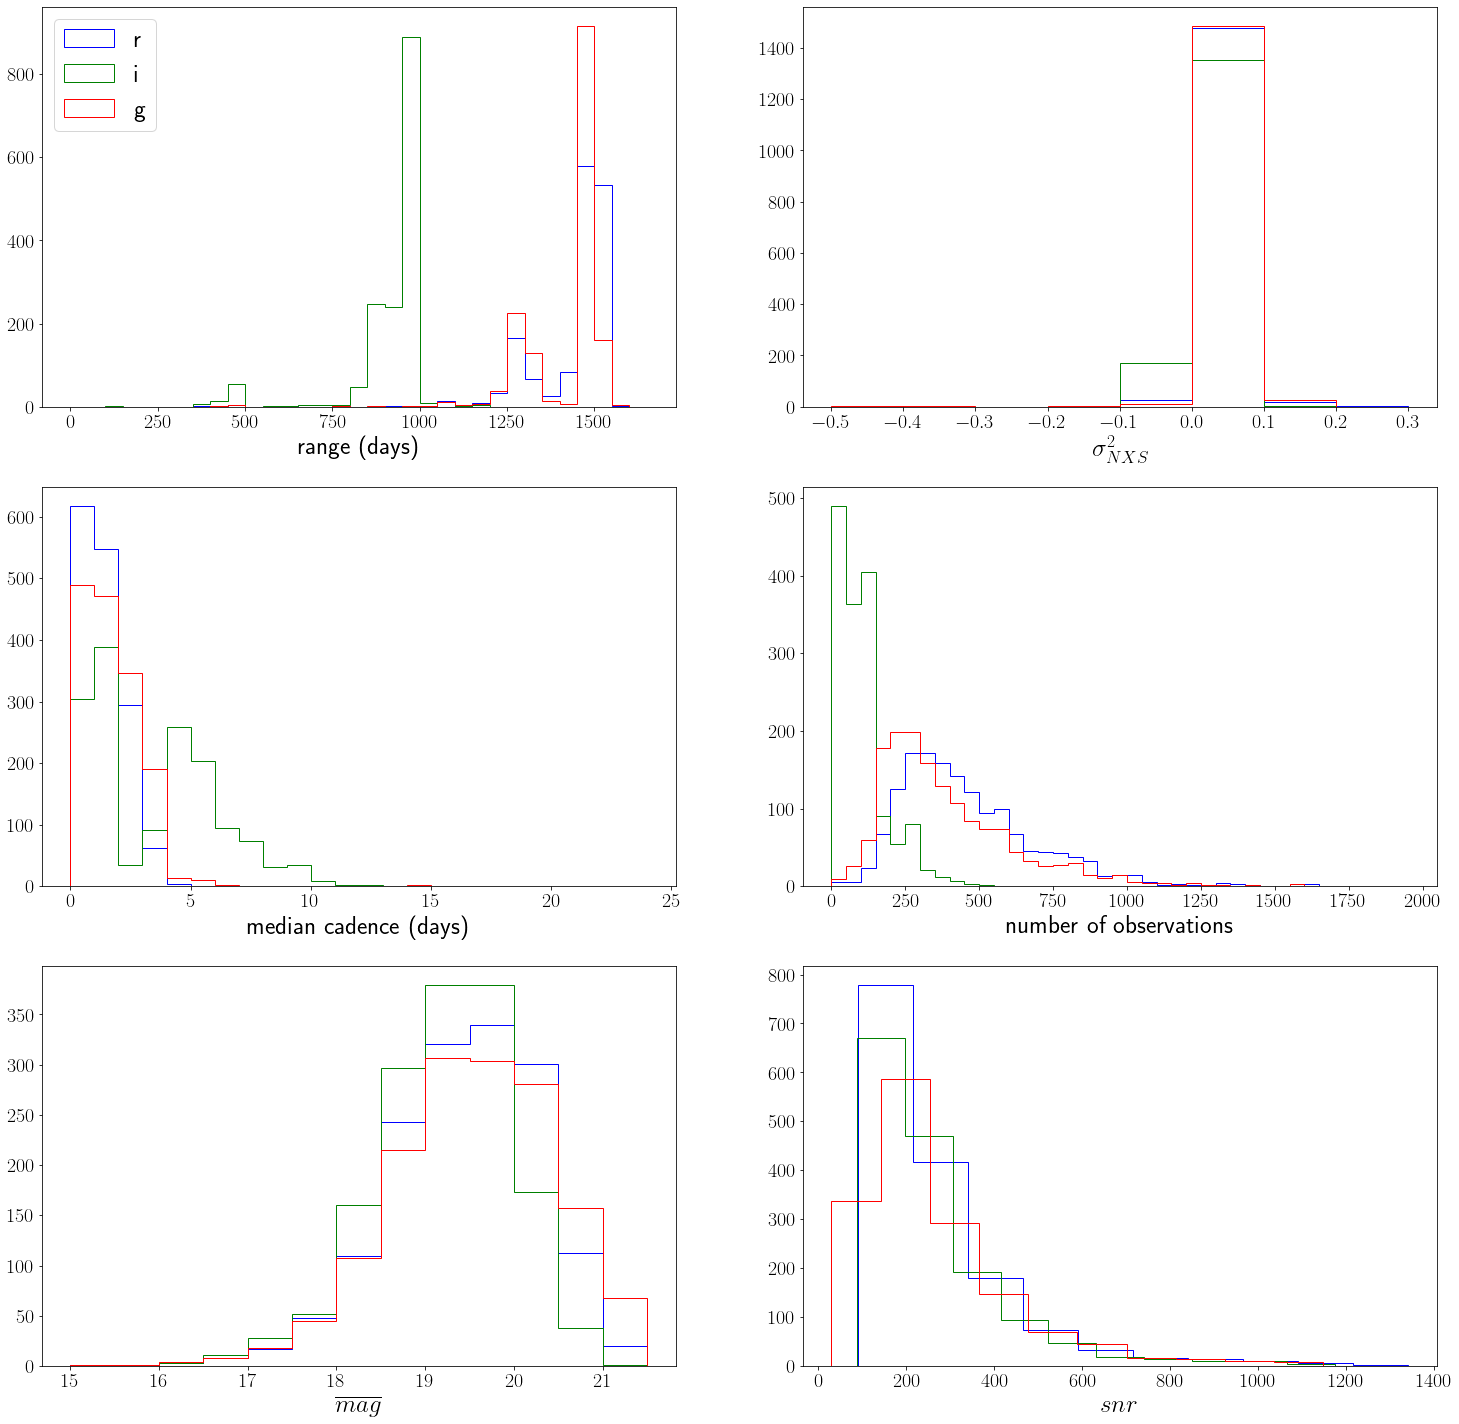

In [287]:
fig, ax = plt.subplots(3,2, figsize=(25,25))

means = lcs.mean_mag
## mean mags   
gtz_r = means[:,0] > 0 ## filter missing data  gtz -> greater than 0 
gtz_i = means[:,1] > 0
gtz_g = means[:,2] > 0
bins = np.arange(15,np.max(means), step=0.5)
ax[2][0].hist(means[gtz_r,0],bins=bins,label='r', edgecolor='blue',histtype=u'step')
ax[2][0].hist(means[gtz_i,1],bins=bins,label='i',edgecolor='green',histtype=u'step')
ax[2][0].hist(means[gtz_g,2],bins=bins,label='g',edgecolor='red',histtype=u'step')
ax[2][0].set_xlabel(r'$\overline{mag}$', fontsize=fs)

## range
ranges = np.array([np.ptp(lc[:,0]) for object_lcs in lcs.dataset for lc in object_lcs]).reshape(-1,3)
bins = np.arange(np.max(ranges), step=50)
ax[0][0].hist(ranges[gtz_r,0],label='r',bins=bins, edgecolor='blue',histtype=u'step')
ax[0][0].hist(ranges[gtz_i,1],label='i',bins=bins,edgecolor='green',histtype=u'step')
ax[0][0].hist(ranges[gtz_g,2],label='g',bins=bins,edgecolor='red',histtype=u'step')
ax[0][0].legend(loc="upper left",fontsize=fs)
ax[0][0].set_xlabel(r'range (days)', fontsize=fs)

## med cadence
bins = np.arange(0,25,1)
ax[1][0].hist(lcs.med_cadence[gtz_r,0],label='r',bins=bins, edgecolor='blue',histtype=u'step')
ax[1][0].hist(lcs.med_cadence[gtz_i,1],label='i',bins=bins,edgecolor='green',histtype=u'step')
ax[1][0].hist(lcs.med_cadence[gtz_g,2],label='g',bins=bins,edgecolor='red',histtype=u'step')
ax[1][0].set_xlabel(r'median cadence (days)',fontsize=fs)

## epochs 
l = np.array([len(lc) for object_lcs in lcs.dataset for lc in object_lcs]).reshape(-1,3)  
bins = np.arange(2000, step=50)
ax[1][1].hist(l[gtz_r,0],label='r',bins=bins, edgecolor='blue',histtype=u'step')
ax[1][1].hist(l[gtz_i,1],label='i',bins=bins,edgecolor='green',histtype=u'step')
ax[1][1].hist(l[gtz_g,2],label='g',bins=bins,edgecolor='red',histtype=u'step')
ax[1][1].set_xlabel(r'number of observations', fontsize=fs)

bins = np.arange(-0.5, 0.4, step=0.1)
ax[0][1].hist(lcs.sigma_xs[gtz_r,0],bins=bins,label='r', edgecolor='blue',histtype=u'step')
ax[0][1].hist(lcs.sigma_xs[gtz_i,1],bins=bins,label='i',edgecolor='green',histtype=u'step')
ax[0][1].hist(lcs.sigma_xs[gtz_g,2],bins=bins,label='g',edgecolor='red',histtype=u'step')
ax[0][1].set_xlabel(r'$\sigma^2_{NXS}$',fontsize=fs)

snr = np.array([np.mean(lc[:,1] / np.mean(lc[:,2])) for object_lcs in lcs.dataset for lc in object_lcs]).reshape(-1,3) 
ax[2][1].hist(snr[gtz_r,0],label='r', edgecolor='blue',histtype=u'step')
ax[2][1].hist(snr[gtz_i,1],label='i',edgecolor='green',histtype=u'step')
ax[2][1].hist(snr[gtz_g,2],label='g',edgecolor='red',histtype=u'step')
ax[2][1].set_xlabel(r'$snr$',fontsize=fs)

# fig.delaxes(ax[2,1])

# plt.savefig('../img/sampledist')

In [255]:

n = 1.679 # stds

means_g = means[gtz_g,:].mean(-1)
mean_mean_mag = np.mean(means_g)
std_mean_mag = np.std(means_g)
anom_mean_mag = np.where(means_g > ((n*std_mean_mag) + mean_mean_mag)) | (means_g < (mean_mean_mag - (n*std_mean_mag)))[0] 


ranges_g = ranges[gtz_g,:].mean(-1)
mean_ranges = np.mean(ranges_g)
std_ranges = np.std(ranges_g)
anom_range = np.where(ranges_g > ((n*std_ranges) + mean_ranges)) | (ranges_g < (mean_ranges - (n*std_ranges)))[0] 


med_cads_g = lcs.med_cadence[gtz_g,:].mean(-1)
mean_med_cads = np.mean(med_cads_g)
std_med_cads = np.std(med_cads_g)
anom_med_cad = np.where(med_cads_g > ((n*std_med_cads) + mean_med_cads)) | (med_cads_g < (mean_med_cads - (n*std_med_cads)))[0]


ls_g = l[gtz_g,:].mean(-1)
mean_l = np.mean(ls_g)
std_l = np.std(ls_g)
anom_l = np.where(ls_g > ((n*std_l) + mean_l)) | (ls_g < (mean_l - (n*std_l)))[0] 


nxs_g = lcs.sigma_nxs[gtz_g,:].mean(-1)
mean_nxs = np.mean(nxs_g)
std_nxs = np.std(nxs_g)
anom_nxs = np.where(nxs_g > ((n*std_nxs) + mean_nxs)) | (nxs_g < (mean_nxs - (n*std_nxs)))[0]

snr_g = snr[gtz_g, :].mean(-1)
mean_snr = np.mean(snr_g)
std_snr = np.std(snr_g)
anom_snr = np.where(snr_g > ((n*std_snr) + mean_snr)) | (snr_g < (mean_snr - (n*std_snr)))[0] 


In [256]:
anom_snr.shape

(1, 100)

### Count the number of missing light curves in each band

In [17]:
l = len(lcs.dataset)
lcs_per_obj = (means > 0).sum(axis=1)
one = (lcs_per_obj == 1).sum()
two = (lcs_per_obj == 2).sum()
three = (lcs_per_obj == 3).sum()
print(one, 'missing 2\n',
      two, 'missing 1\n',
      three, 'complete')
print(l-gtz_r.sum(), 'missing in r\n',
      l-gtz_i.sum(), 'missing in i\n',
      l-gtz_g.sum(), 'missing in g\n')

186 missing 2
 791 missing 1
 1698 complete
80 missing in r
 949 missing in i
 134 missing in g

